In [1]:
## IMPORT DEPENDENCIES ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
import time
import warnings

pd.set_option('display.max_columns', None)
plt.style.use(style = 'seaborn')

warnings.filterwarnings('ignore')

In [2]:
%%time

## DATA IMPORT ## 
## For this project the data from https://www.kaggle.com/c/ieee-fraud-detection/data has been used. ##

data_path = "./data/"

train = pd.read_csv(data_path + "train_processed.csv")
test = pd.read_csv(data_path + "test_processed.csv")

print('train_set shape is: {}'.format(train.shape))
print('test_set shape is: {}'.format(test.shape))

train_set shape is: (590540, 435)
test_set shape is: (506691, 434)
Wall time: 43.7 s


In [3]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
test.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


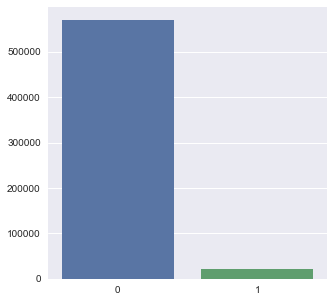

In [3]:
fig = plt.figure(figsize = (5, 5))

sns.barplot(x = [0,1], y = train['isFraud'].value_counts().values)
plt.show()

In [4]:
fraud_ratio = train['isFraud'].sum()/len(train['isFraud'])
print(fraud_ratio) # percentage of frauds in the train set
del fraud_ratio 

0.03499000914417313


In [19]:
stats_df = pd.DataFrame(columns = ['train_time', 'precision', 'accuracy', 'recall', 'roc_auc'])

In [22]:
%%time
# UNBALANCED APPROACH - DECISION TREE

import datetime

start_time = datetime.datetime.now()

X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, shuffle=False)

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

from sklearn.tree import DecisionTreeClassifier

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
#from sklearn.model_selection import RandomizedSearchCV

#clf_model = DecisionTreeClassifier(criterion="gini")
#distrib = dict(max_depth = [10,100,500], min_samples_leaf=[5,10,20,50])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#clf_model = DecisionTreeClassifier(criterion="gini", max_depth = search.best_params_['max_depth'], min_samples_leaf = search.best_params_['min_samples_leaf'])

# optimal values are: 'min_samples_leaf': 20, 'max_depth': 10
## ------------------------------------------- ##

clf_model = DecisionTreeClassifier(criterion="gini", max_depth = 10, min_samples_leaf = 20)
clf_model.fit(X_train_imp,y_train)
y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = clf_model.predict(X_test_imp)
y_train_pred = clf_model.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Unbalanced DT - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Unbalanced DT - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Unbalanced DT - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Unbalanced DT - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Unbalanced DT - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Unbalanced DT - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Unbalanced DT - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Unbalanced DT - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')

end_time = datetime.datetime.now() - start_time

stats_df.loc['UNBALANCED APPROACH - DECISION TREE'] = ([end_time,
                                                         precision_score(y_train, y_train_pred),
                                                         accuracy_score(y_train, y_train_pred),
                                                         recall_score(y_train, y_train_pred),
                                                         roc_auc_score(y_train, y_train_pred)
                                                        ])

-----------------------------------------------------
Unbalanced DT - train precision score is 0.8881843489019486
Unbalanced DT - train accuracy score is 0.975490652623023
Unbalanced DT - train recall score is 0.3459846978733659
Unbalanced DT - train auc score is 0.6721992953403
-----------------------------------------------------
Unbalanced DT - test precision score is 0.6646115906288532
Unbalanced DT - test accuracy score is 0.9701121007891083
Unbalanced DT - test recall score is 0.265255905511811
Unbalanced DT - test auc score is 0.6302429083870655
-----------------------------------------------------
 Train confusion matrix
[[455110    723]
 [ 10856   5743]]
-----------------------------------------------------
 Test confusion matrix
[[113500    544]
 [  2986   1078]]
-----------------------------------------------------
Wall time: 5h 12min 39s


In [23]:
search.best_params_

{'min_samples_leaf': 20, 'max_depth': 10}

In [29]:
%%time
# UNBALANCED APPROACH - XGBOOST

import datetime

start_time = datetime.datetime.now()

## ------------------------------------------- ##
## RANDOM SEARCH TUNING - IT ONLY RUNS ONCE
from sklearn.model_selection import RandomizedSearchCV

clf_model = xgb.XGBClassifier(criterion="gini")
distrib = dict(max_depth = [1,5,10], n_estimators = [10, 50, 100], learning_rate=[0.02, 0.1, 0.5])
clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
search = clf.fit(X_train_imp,y_train)
xgmodel = xgb.XGBClassifier(tree_method = 'gpu_hist',
                           max_depth = search.best_params_['max_depth'],
                           n_estimators = search.best_params_['n_estimators'],
                           learning_rate = search.best_params_['learning_rate'])

# optimal values are: 'n_estimators': , 'max_depth': . learning_rate: 
## ------------------------------------------- ##

#xgmodel = xgb.XGBClassifier(tree_method = 'gpu_hist')

xgmodel.fit(X_train_imp,y_train)

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Unbalanced XGB - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Unbalanced XGB - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Unbalanced XGB - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Unbalanced XGB - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Unbalanced XGB - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Unbalanced XGB - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Unbalanced XGB - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Unbalanced XGB - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')


end_time = datetime.datetime.now() - start_time

stats_df.loc['UNBALANCED APPROACH - XGBOOST'] = ([end_time,
                                                         precision_score(y_train, y_train_pred),
                                                         accuracy_score(y_train, y_train_pred),
                                                         recall_score(y_train, y_train_pred),
                                                         roc_auc_score(y_train, y_train_pred)
                                                        ])

[11:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[12:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[16:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[16:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

XGBoostError: [16:59:59] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_gpu_hist.cu:793: Exception in gpu_hist: [16:59:59] c:\users\administrator\workspace\xgboost-win64_release_1.4.0\src\tree\param.h:244: Check failed: this->max_depth <= 31 (100 vs. 31) : max_depth can not be greater than 31 as that might generate 2 ** 32 - 1 nodes.


In [22]:
%%time
## UNDERSAMPLING APPROACH - DECISION TREE

import datetime

start_time = datetime.datetime.now()

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X)

# Impute our data, then train
X_imp = imp.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=17, shuffle=False)

ros = RandomUnderSampler(random_state=17)

X_train, y_train = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train)))

from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=17,max_depth=100, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_pred = []
y_pred = clf_model.predict(X_test)
y_train_pred = clf_model.predict(X_train)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Undersampled DT - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Undersampled DT - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Undersampled DT - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Undersampled DT - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Undersampled DT - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Undersampled DT - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Undersampled DT - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Undersampled DT - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')


end_time = datetime.datetime.now() - start_time

stats_df.loc['UNDERSAMPLING APPROACH - DECISION TREE'] = ([end_time,
                                                         precision_score(y_train, y_train_pred),
                                                         accuracy_score(y_train, y_train_pred),
                                                         recall_score(y_train, y_train_pred),
                                                         roc_auc_score(y_train, y_train_pred)
                                                        ])

Resampled dataset shape Counter({0: 16604, 1: 16604})
-----------------------------------------------------
Undersampled DT - train precision score is 0.9336237040672352
Undersampled DT - train accuracy score is 0.9257106721271983
Undersampled DT - train recall score is 0.91658636473139
Undersampled DT - train auc score is 0.9257106721271984
-----------------------------------------------------
Undersampled DT - test precision score is 0.12459387986399698
Undersampled DT - test accuracy score is 0.7973634300809429
Undersampled DT - test recall score is 0.8125153978812515
Undersampled DT - test auc score is 0.8046697849738219
-----------------------------------------------------
 Train confusion matrix
[[15522  1082]
 [ 1385 15219]]
-----------------------------------------------------
 Test confusion matrix
[[90877 23172]
 [  761  3298]]
-----------------------------------------------------
Wall time: 40.8 s


In [23]:
%%time
## UNDERSAMPLING APPROACH - XGBOOST

import datetime

start_time = datetime.datetime.now()

xgmodel = xgb.XGBClassifier(n_estimators = 100,
                            max_depth = 12,
                            learning_rate = 0.02,
                            subsample = 0.8,
                            colsample_bytree = 0.4,
                            missing = -1,
                            random_state = 42,
                            tree_method = 'gpu_hist')
xgmodel.fit(X_train,y_train)

y_pred = []
y_pred = xgmodel.predict(X_test)
y_train_pred = xgmodel.predict(X_train)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Undersampled XGB - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Undersampled XGB - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Undersampled XGB - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Undersampled XGB - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Undersampled XGB - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Undersampled XGB - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Undersampled XGB - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Undersampled XGB - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')


end_time = datetime.datetime.now() - start_time

stats_df.loc['UNDERSAMPLING APPROACH - XGBOOST'] = ([end_time,
                                                         precision_score(y_train, y_train_pred),
                                                         accuracy_score(y_train, y_train_pred),
                                                         recall_score(y_train, y_train_pred),
                                                         roc_auc_score(y_train, y_train_pred)
                                                        ])

[09:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------------------------
Undersampled XGB - train precision score is 0.9445770352691594
Undersampled XGB - train accuracy score is 0.9038785834738617
Undersampled XGB - train recall score is 0.8581064803661769
Undersampled XGB - train auc score is 0.9038785834738617
-----------------------------------------------------
Undersampled XGB - test precision score is 0.20513931888544892
Undersampled XGB - test accuracy score is 0.8849950892403563
Undersampled XGB - test recall score is 0.8162108893816211
Undersampled XGB - test auc score is 0.851827002968393
-----------------------------------------------------
 Train confusion matrix
[[15768   836]
 [ 2356 1

In [ ]:
%%time
## OVERSAMPLING APPROACH - DECISION TREE

import datetime

start_time = datetime.datetime.now()

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=17)
X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)
X_resampled, y_resampled = ros.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=17)

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=17,max_depth=100, min_samples_leaf=50)   
clf_model.fit(X_train_imp,y_train)
y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = clf_model.predict(X_test_imp)
y_train_pred = clf_model.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Oversampled DT - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Oversampled DT - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Oversampled DT - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Oversampled DT - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Oversampled DT - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Oversampled DT - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Oversampled DT - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Oversampled DT - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
## OVERSAMPLING IS BETTER THAN UNDERSAMPLING.



end_time = datetime.datetime.now() - start_time

stats_df.loc['OVERSAMPLING APPROACH - DECISION TREE'] = ([end_time,
                                                         precision_score(y_train, y_train_pred),
                                                         accuracy_score(y_train, y_train_pred),
                                                         recall_score(y_train, y_train_pred),
                                                         roc_auc_score(y_train, y_train_pred)
                                                        ])

In [ ]:
%%time
## OVERSAMPLING APPROACH - XGBOOST

import datetime

start_time = datetime.datetime.now()

xgmodel = xgb.XGBClassifier(n_estimators = 100,
                            max_depth = 12,
                            learning_rate = 0.02,
                            subsample = 0.8,
                            colsample_bytree = 0.4,
                            missing = -1,
                            random_state = 42,
                            tree_method = 'gpu_hist')
xgmodel.fit(X_train_imp,y_train)

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Oversampled XGB - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Oversampled XGB - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Oversampled XGB - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Oversampled XGB - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Oversampled XGB - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Oversampled XGB - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Oversampled XGB - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Oversampled XGB - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')



end_time = datetime.datetime.now() - start_time

stats_df.loc['OVERSAMPLING APPROACH - XGBOOST'] = ([end_time,
                                                         precision_score(y_train, y_train_pred),
                                                         accuracy_score(y_train, y_train_pred),
                                                         recall_score(y_train, y_train_pred),
                                                         roc_auc_score(y_train, y_train_pred)
                                                        ])

In [ ]:
# LET'S PRINT SOME STATS ABOUT THE EXPERIMENTS 

print(stats_df)

## THE BEST OVERALL APPROACH IS DECISION TREE WITH OVERSAMPLING

In [ ]:
#%%time

#from sklearn.model_selection import RandomizedSearchCV

#clf_model = DecisionTreeClassifier(criterion="gini")
#distrib = dict(max_depth = [10,100,500], min_samples_leaf=[5,10,20,50])
#clf = RandomizedSearchCV(clf_model, distrib, random_state=17)
#search = clf.fit(X_train_imp,y_train)
#search.best_params_


# search of best params output - {'min_samples_leaf': 5, 'max_depth': 500}
#from sklearn.ensemble import RandomForestClassifier
#clf_model = RandomForestClassifier(max_depth=100, min_samples_leaf=50, n_estimators = 500)   
#clf_model.fit(X_train_imp,y_train)
#y_pred = []
#X_test_imp = imp.transform(X_test)
#y_pred = clf_model.predict(X_test_imp)


#from sklearn.metrics import precision_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import recall_score

#print('precision score is {}'.format(precision_score(y_test, y_pred)))
#print('accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
#print('recall score is {}'.format(recall_score(y_test, y_pred)))
#print('auc score is {}'.format(roc_auc_score(y_test, y_pred)))

# RANDOMFOREST RESULTS, 500 trees, max depth 100, min leaves 50
# precision score is 0.9363672902660041
# accuracy score is 0.9202065356151102

In [ ]:
%%time
#tree_best_clf = DecisionTreeClassifier(criterion="gini", 
#                                       max_depth = search.best_params_['max_depth'], 
#                                       min_samples_leaf = search.best_params_['min_samples_leaf'])

tree_best_clf = DecisionTreeClassifier(criterion="gini", 
                                       max_depth = 500, 
                                       min_samples_leaf = 5)

tree_best_clf.fit(X_train_imp,y_train)
X_test_imp = imp.transform(X_test)
y_pred = tree_best_clf.predict(X_test_imp)
y_train_pred = tree_best_clf.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Oversampled BESTDT - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Oversampled BESTDT - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Oversampled BESTDT - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Oversampled BESTDT - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Oversampled BESTDT - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Oversampled BESTDT - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Oversampled BESTDT - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Oversampled BESTDT - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')

In [ ]:
%%time
## OVERSAMPLING APPROACH - XGBOOST 2000 ESTIMATORS (it takes approximately 80 minutes on my laptop)

xgmodel = xgb.XGBClassifier(n_estimators = 2000,
                            max_depth = 12,
                            learning_rate = 0.02,
                            subsample = 0.8,
                            colsample_bytree = 0.4,
                            missing = -1,
                            random_state = 42,
                            tree_method = 'gpu_hist')
xgmodel.fit(X_train_imp,y_train)

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Oversampled XGB - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Oversampled XGB - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Oversampled XGB - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Oversampled XGB - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Oversampled XGB - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Oversampled XGB - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Oversampled XGB - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Oversampled XGB - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')

In [ ]:
%%time

## EXP1 - OVERSAMPLING APPROACH ONLY FOR TRAIN (TEST DATA NOT OVERSAMPLED) - DT

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=17)

ros = RandomOverSampler(random_state=17)
X_train, y_train = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train)))


from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=17,max_depth=100, min_samples_leaf=50)   
clf_model.fit(X_train_imp,y_train)
y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = clf_model.predict(X_test_imp)
y_train_pred = clf_model.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Train Oversampled DT - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Train Oversampled DT - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Train Oversampled DT - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Train Oversampled DT - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Train Oversampled DT - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Train Oversampled DT - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Train Oversampled DT - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Train Oversampled DT - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')


In [ ]:
%%time
## EXP1 - OVERSAMPLING APPROACH ONLY FOR TRAIN (TEST DATA NOT OVERSAMPLED) - XGB

xgmodel = xgb.XGBClassifier(n_estimators = 100,
                            max_depth = 12,
                            learning_rate = 0.02,
                            subsample = 0.8,
                            colsample_bytree = 0.4,
                            missing = -1,
                            random_state = 42,
                            tree_method = 'gpu_hist')
xgmodel.fit(X_train_imp,y_train)

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Oversampled XGB - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Oversampled XGB - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Oversampled XGB - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Oversampled XGB - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Oversampled XGB - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Oversampled XGB - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Oversampled XGB - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Oversampled XGB - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')

In [ ]:
%%time

## EXP2 - OVERSAMPLING APPROACH ONLY FOR TRAIN (TEST DATA NOT OVERSAMPLED) - DT

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=17)

ros = RandomOverSampler(random_state=17)
X_train, y_train = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train)))


from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=17,max_depth=500, min_samples_leaf=5)   
clf_model.fit(X_train_imp,y_train)
y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = clf_model.predict(X_test_imp)
y_train_pred = clf_model.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Train Oversampled DT - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Train Oversampled DT - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Train Oversampled DT - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Train Oversampled DT - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Train Oversampled DT - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Train Oversampled DT - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Train Oversampled DT - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Train Oversampled DT - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')


In [ ]:
%%time
## EXP2 - OVERSAMPLING APPROACH ONLY FOR TRAIN (TEST DATA NOT OVERSAMPLED) - XGB

xgmodel = xgb.XGBClassifier(n_estimators = 2000,
                            max_depth = 12,
                            learning_rate = 0.02,
                            subsample = 0.8,
                            colsample_bytree = 0.4,
                            missing = -1,
                            random_state = 42,
                            tree_method = 'gpu_hist')
xgmodel.fit(X_train_imp,y_train)

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Oversampled XGB - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Oversampled XGB - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Oversampled XGB - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Oversampled XGB - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Oversampled XGB - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Oversampled XGB - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Oversampled XGB - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Oversampled XGB - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')

In [ ]:
%%time
## EXP3 - OVERSAMPLING APPROACH ONLY FOR TRAIN (TEST DATA NOT OVERSAMPLED) - XGB

xgmodel = xgb.XGBClassifier(n_estimators = 5000,
                            max_depth = 12,
                            learning_rate = 0.02,
                            subsample = 0.8,
                            colsample_bytree = 0.4,
                            missing = -1,
                            random_state = 42,
                            tree_method = 'gpu_hist')
xgmodel.fit(X_train_imp,y_train)

y_pred = []
X_test_imp = imp.transform(X_test)
y_pred = xgmodel.predict(X_test_imp)
y_train_pred = xgmodel.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Oversampled XGB - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Oversampled XGB - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Oversampled XGB - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Oversampled XGB - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Oversampled XGB - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Oversampled XGB - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Oversampled XGB - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Oversampled XGB - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')

# IT SEEMS THAT THE OVERSAMPLING APPLIED TO BOTH THE TRAINING AND TESTING SET LETS THE ALGORITHM LEARN TOO WELL, 
#HENCE THE RESULTS OF THE TEST SET ARE BIASED

In [ ]:
%%time
## UNDERSAMPLING APPROACH - XGB

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomUnderSampler(random_state=17)
X = train.copy()
y = train['isFraud'].copy()
X = X.drop(['isFraud'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=17)

X_train, y_train = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train)))


from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)


## UNDERSAMPLING APPROACH - XGBOOST WITH RANDOMSEARCH

from sklearn.model_selection import RandomizedSearchCV

xgmodel = xgb.XGBClassifier(tree_method = 'gpu_hist', random_state = 17)
distrib = dict(n_estimators = [10,100,1000,2000], max_depth = [10,50], learning_rate=[0.02, 0.2, 2])
clf = RandomizedSearchCV(xgmodel, distrib, random_state=17)
search = clf.fit(X_train_imp,y_train)
search.best_params_
best_xgb = xgb.XGBClassifier(tree_method = 'gpu_hist', random_state = 17, 
                             max_depth = search.best_params_['max_depth'],
                             n_estimators = search.best_params_['n_estimators'],
                             learning_rate = search.best_params_['learning_rate'])



y_pred = []
X_test_imp = imp.transform(X_test)
best_xgb.fit(X_train_imp,y_train)
y_pred = best_xgb.predict(X_test_imp)
y_train_pred = best_xgb.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Undersampled XGB RandomSearch - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Undersampled XGB RandomSearch - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Undersampled XGB RandomSearch - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Undersampled XGB RandomSearch - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Undersampled XGB RandomSearch - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Undersampled XGB RandomSearch - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Undersampled XGB RandomSearch - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Undersampled XGB RandomSearch - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')

In [ ]:
search.best_params_ 

In [ ]:

y_train_pred = best_xgb.predict(X_train_imp)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print('-----------------------------------------------------')
print('Undersampled XGB RandomSearch - train precision score is {}'.format(precision_score(y_train, y_train_pred)))
print('Undersampled XGB RandomSearch - train accuracy score is {}'.format(accuracy_score(y_train, y_train_pred)))
print('Undersampled XGB RandomSearch - train recall score is {}'.format(recall_score(y_train, y_train_pred)))
print('Undersampled XGB RandomSearch - train auc score is {}'.format(roc_auc_score(y_train, y_train_pred)))
print('-----------------------------------------------------')
print('Undersampled XGB RandomSearch - test precision score is {}'.format(precision_score(y_test, y_pred)))
print('Undersampled XGB RandomSearch - test accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Undersampled XGB RandomSearch - test recall score is {}'.format(recall_score(y_test, y_pred)))
print('Undersampled XGB RandomSearch - test auc score is {}'.format(roc_auc_score(y_test, y_pred)))
print('-----------------------------------------------------')
print(' Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('-----------------------------------------------------')
print(' Test confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')